# Cross validation

In some previous exercises, we verified the results obtained with our point estimation methods (Kriging included) by comparing the results against some reference data and agains the a reference "truth". In real case studies, a reference "truth" is not avaiable. Nevetheless, when many data are available, one can keep a portion of the data aside and use them only to validate the procedure.

The *cross validation* technique, or "leave one out" techniche, is based on this principle:

1. remove one point were we have a measurement
2. use Kriging to estimate ad that point
3. compute the error done by the estimation in that point
4. repeat the procedure for all the available measurement point
5. compute a Meas Absolute Error, MSE or RMSE.

Hereinafter an example application with some syntetic data, inspided from the script [ex_vario_analysis_data1D_1.ipynb](https://github.com/randlab/geone/blob/master/examples/ex_vario_analysis_data1D_1.ipynb) of the library [geone](https://github.com/randlab/geone) by Julien Straubhaar.

First of all, import the required modules.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import time

# import package 'geone'
import geone as gn

Then define a covariance model (a variogram) and plot it

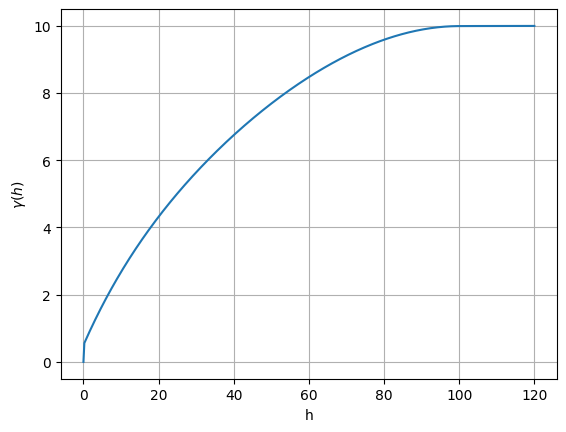

In [2]:
cov_model_ref = gn.covModel.CovModel1D(elem=[
    ('spherical', {'w':7., 'r':100}),   # elementary contribution
    ('exponential', {'w':2.5, 'r':50}), # elementary contribution
    ('nugget', {'w':0.5})               # elementary contribution
    ], name='ref model')


cov_model_ref.plot_model(vario=True)

Then we define a simulation grid, that defines the points where we will simulate a Gaussian random field to be used as a reference data set and to be sampled for use in this exercise. `nx` is the number of points, `dx` is the cell size and `ox` is the coordinate of the first sample.

In [3]:
nx = 1000 # number of cells
dx = 0.5  # cell unit
ox = 0.0  # origin
# xmin, xmax = ox, ox + nx*dx # bounds of the simulation domain

We then simulate some points in the defined grid using the variogram defined above.

In [4]:
# Reference simulation
np.random.seed(123)
ref = gn.grf.grf1D(cov_model_ref, nx, dx, ox, nreal=1) # 2d-array of shape 1 x nx

# Extract n points from the reference simulation
n = 25 # number of data points
ind = np.random.choice(nx, size=n, replace=False) # indexes of extracted grid cells
x = ox + (ind + 0.5)*dx # coordinates of data points (centers of the extracted grid cells)
#x = ox + (ind + np.random.random(n))*dx # coordinates of data points (within the extracted grid cells)
v = ref[0,ind] # value at data points

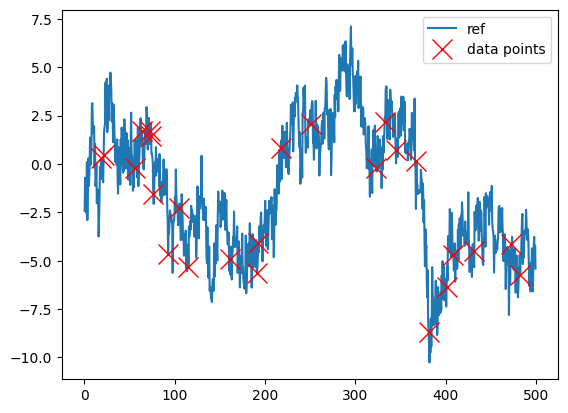

In [5]:
# Plot reference variogram model, reference simulation and data points
fig, ax = pl.subplots(1,1)

ax.plot(ox + (np.arange(nx)+0.5)*dx, ref[0], label='ref')
ax.plot(x, v, 'rx', markersize=15, label='data points')
ax.legend()



Now save the data for the cross validation exercise...

In [6]:
np.savetxt("samples.txt", np.c_[x,v], fmt="%.4e")
np.savetxt("ref.txt", np.c_[ox + (np.arange(nx)+0.5)*dx, ref[0]], fmt="%.4e")
